<h2><center>Title: Prediction of Mood Disorders among DASS Survey Participants</center></h2>

<h3><center>WQD7003: Data Analytics (Assignment)</center></h3>
<h4><center>Group 6</center></h4>
<table style="width:100%">
  <tr>
    <th style="width:10%">No.</th>
    <th>Name</th>
    <th>Matric Number</th>
  </tr>
  <tr>
    <td>1.</td>
    <td>Amy Amanda Lang Pooi Mun</td>
    <td>S2127213</td>
  </tr>
  <tr>
    <td>2.</td>
    <td>Prasanta A/L Sathasivam</td>
    <td>17157826</td>
  </tr>
  <tr>
    <td>3.</td>
    <td>Sharmini Joseph Pereira</td>
    <td>S2114594</td>
  </tr>
  <tr>
    <td>4.</td>
    <td>Soon Jin Sim</td>
    <td>S2043577</td>
  </tr>
</table>

## Index
* [Introduction](#intro)
* [Business Goal](#goal1)
* [Data Mining Goal](#goal2)
* [Initial Questions](#questions)
* [Overview & Motivation](#overview)
* [Related Work](#table)
* [Import Dependencies](#import)
* [Data Import](#data_collection)
* [Data Preprocessing](#data_preprocessing)
 - [Data Cleaning](#data_cleaning)
     - [Cleaning Part 1](#data_cleaning_part1)
     - [Cleaning Part 2](#data_cleaning_part2)
 - [Data Discretization](#noise)
     - [SMOOTHING BY BIN MEDIAN](#median)
* [References](#ref)

<a class="anchor" id="intro"></a>

## Introduction 

<p>To determine ideal candidates for stress and other psychological phenomena studies, the Taylor Manifest Anxiety Scale was created in 1953. Thenceforth, it has been employed as a generic personality trait assessment of anxiety. Anxiety is a multifaceted psychological construct that encompasses a variety of aspects associated with excessive worrying which may hinder day-to-day function. The exam has been extensively investigated and utilized in research, although there are some worries that it does not assess a single characteristic, but rather a collection of loosely linked characteristics, impacting the significance of the score.</p>

<p>In the dataset that we are about to explore, the data as collected using an online platform of the Depression Anxiety Stress Scales (DASS) to the public with the consent of providing their answers in a research survey given at the end of the DASS survey. The data collected is from the year 2017 to 2019.<br>
Some examples of the questions in the survey that are given in a random order:<br>
<br>
Q1: I found myself getting upset by quite trivial things.<br>
Q2: I was aware of dryness of my mouth.<br>
Q3: I couldn't seem to experience any positive feeling at all.<br>
<br>
Which the participant will rank with a 4-point scale rating:<br>
1 = Did not apply to me at all<br>
2 = Applied to me to some degree, or some of the time<br>
3 = Applied to me to a considerable degree, or a good part of the time<br>
4 = Applied to me very much, or most of the time<br>
<br>
Which indicates how frequent the question applies to them in the past week.<p>

<a class="anchor" id="goal1"></a>

## Business Goal 

<ol>
<li>Detecting depression, anxiety, stress levels to prevent societal problems.</li>
</ol>

<a class="anchor" id="goal2"></a>

## Data Mining Goals 

<ol>
<li>Identifying current psychology state of the survey respondents using their given answers</li>
<li>Forecasting the potential mood disorders based on their survey responses</li>
</ol>

<a class="anchor" id="questions"></a>

## Initial Questions 

<ol>
<li>What are the indicators of depression, anxiety or stress among the respondents?</li>
<li>What is the correlation between depression, anxiety and stress based on the dataset?</li>
<li>What are the age groups that are more likely to face depression, anxiety or stress?</li>
<li>Which individuals are going to undergo depression, anxiety or stress in the future?</li>
</ol>

<a class="anchor" id="overview"></a>

## Overview and Motivation

<p>During this Covid-19 endemic, many individuals are suffering from depression, anxiety or stress. Many peoples mental health are severely affected during this prolonged lockdown/Covid-19 restriction throughout the country. We have seen several cases whereby individuals caught attempting suicide or even worse committed suicide due to many different reasons. What's more worrying is that several individuals who look and behave normally are facing these issues as well. That shows mental health problems or mood disorders in people are often goes undetected.</p>

<p>Hence, we are trying to make use of the data from the DASS survey to predict individuals who are more likely to face disorders and then send help to the respective individuals. The ultimate goal of this study is to build an application that actively detects mental health issues using social media data and recommends appropriate actions that need to be taken by the responsible authorities. In doing so, this could prevent in thus reduce the suicidal rate in our country.</p>

<a class="anchor" id="table"></a>

## Related Work 

![](table.png)

<a class="anchor" id="import"></a>

## Import Dependencies

In [2]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
from scipy.stats import binned_statistic

<a class="anchor" id="data_collection"></a>

## Data Import 

In [3]:
df = pd.read_csv('data.csv')
df.head()

,Q1A,Q1I,Q1E,Q2A,Q2I,Q2E,Q3A,Q3I,Q3E,Q4A,...,screensize,uniquenetworklocation,hand,religion,orientation,race,voted,married,familysize,major
0,4,28,3890,4,25,2122,2,16,1944,4,...,1,1,1,12,1,10,2,1,2,NaN
1,4,2,8118,1,36,2890,2,35,4777,3,...,2,1,2,7,0,70,2,1,4,NaN
2,3,7,5784,1,33,4373,4,41,3242,1,...,2,1,1,4,3,60,1,1,3,NaN
3,2,23,5081,3,11,6837,2,37,5521,1,...,2,1,2,4,5,70,2,1,5,biology
4,2,36,3215,2,13,7731,3,5,4156,4,...,2,2,3,10,1,10,2,1,4,Psychology


In [ ]:
df.dtypes

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39775 entries, 0 to 39774
Columns: 172 entries, Q1A to major
dtypes: int64(170), object(2)
memory usage: 52.2+ MB


<a class="anchor" id="data_preprocessing"></a>

## Data Pre-processing <a class="anchor" id="data_cleaning"></a> 

### Data Cleaning 

In [15]:
df.isna()

,Q1A,Q1I,Q1E,Q2A,Q2I,Q2E,Q3A,Q3I,Q3E,Q4A,...,screensize,uniquenetworklocation,hand,religion,orientation,race,voted,married,familysize,major
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39770,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
39771,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
39772,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
39773,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [13]:
df.isna().sum()

Q1A               0
Q1I               0
Q1E               0
Q2A               0
Q2I               0
              ...  
race              0
voted             0
married           0
familysize        0
major         11403
Length: 172, dtype: int64

In [22]:
sum(df.isna().sum())

11405

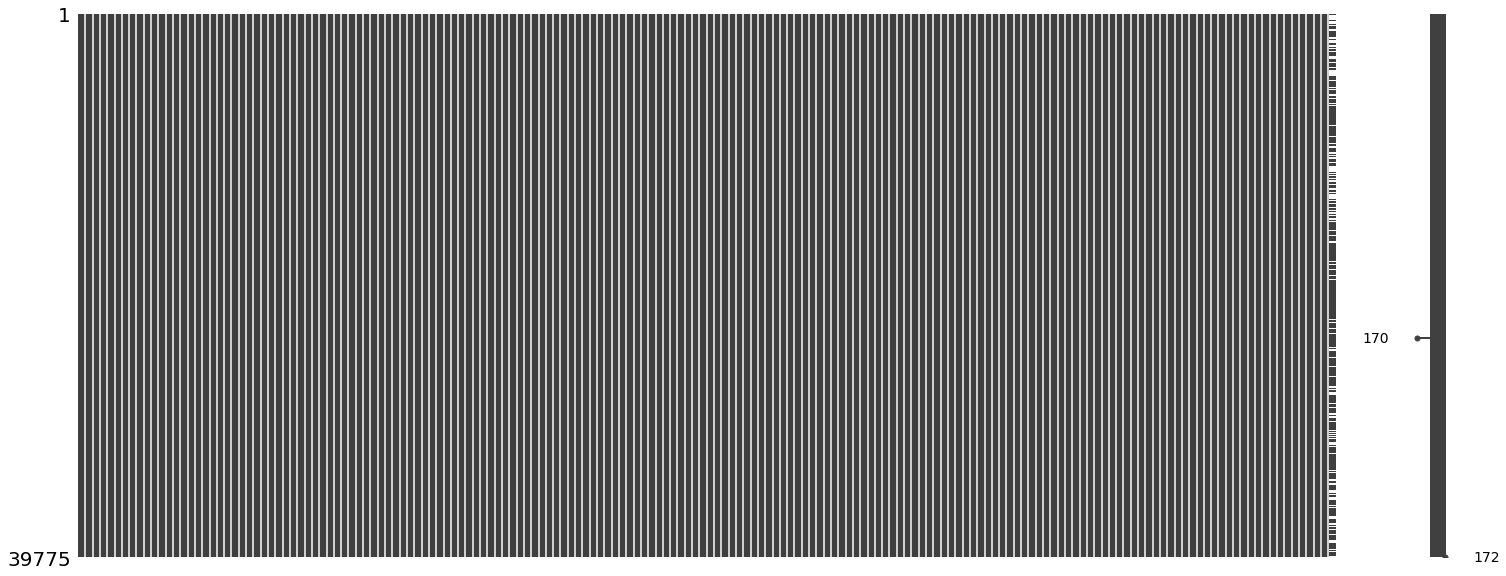

In [21]:
msno.matrix(df)
plt.show()
#plt.savefig('missing.png')

In [18]:
df.describe()

,Q1A,Q1I,Q1E,Q2A,Q2I,Q2E,Q3A,Q3I,Q3E,Q4A,...,age,screensize,uniquenetworklocation,hand,religion,orientation,race,voted,married,familysize
count,39775.000000,39775.000000,3.977500e+04,39775.000000,39775.000000,3.977500e+04,39775.000000,39775.000000,3.977500e+04,39775.000000,...,39775.000000,39775.000000,39775.000000,39775.00000,39775.000000,39775.000000,39775.000000,39775.000000,39775.000000,39775.000000
mean,2.619485,21.555977,6.970591e+03,2.172269,21.248070,5.332376e+03,2.226097,21.583004,7.426446e+03,1.950170,...,23.612168,1.274519,1.200025,1.13516,7.555852,1.642992,31.312885,1.705795,1.159547,3.510270
std,1.032117,12.133621,8.670513e+04,1.111563,12.125288,2.651361e+04,1.038526,12.115637,1.587024e+05,1.042218,...,21.581722,0.446277,0.400024,0.40030,3.554395,1.351362,25.871272,0.473388,0.445882,2.141518
min,1.000000,1.000000,1.800000e+02,1.000000,1.000000,1.760000e+02,1.000000,1.000000,-1.081400e+04,1.000000,...,13.000000,1.000000,1.000000,0.00000,0.000000,0.000000,10.000000,0.000000,0.000000,0.000000
25%,2.000000,11.000000,2.664000e+03,1.000000,11.000000,2.477000e+03,1.000000,11.000000,2.857000e+03,1.000000,...,18.000000,1.000000,1.000000,1.00000,4.000000,1.000000,10.000000,1.000000,1.000000,2.000000
50%,3.000000,22.000000,3.609000e+03,2.000000,21.000000,3.511000e+03,2.000000,22.000000,3.898000e+03,2.000000,...,21.000000,1.000000,1.000000,1.00000,10.000000,1.000000,10.000000,2.000000,1.000000,3.000000
75%,4.000000,32.000000,5.358000e+03,3.000000,32.000000,5.216000e+03,3.000000,32.000000,5.766000e+03,3.000000,...,25.000000,2.000000,1.000000,1.00000,10.000000,2.000000,60.000000,2.000000,1.000000,4.000000
max,4.000000,42.000000,1.210228e+07,4.000000,42.000000,2.161057e+06,4.000000,42.000000,2.858269e+07,4.000000,...,1998.000000,2.000000,2.000000,3.00000,12.000000,5.000000,70.000000,2.000000,3.000000,133.000000


<a class="anchor" id="data_cleaning_part1"></a>

### Data Cleaning (Replacing Missing Values in Major Column) 

In [23]:
df['major'] = df['major'].fillna('Unknown')

In [47]:
df.isna().sum()

Q1A           0
Q1I           0
Q1E           0
Q2A           0
Q2I           0
             ..
race          0
voted         0
married       0
familysize    0
major         0
Length: 172, dtype: int64

In [25]:
sum(df.isna().sum())

2

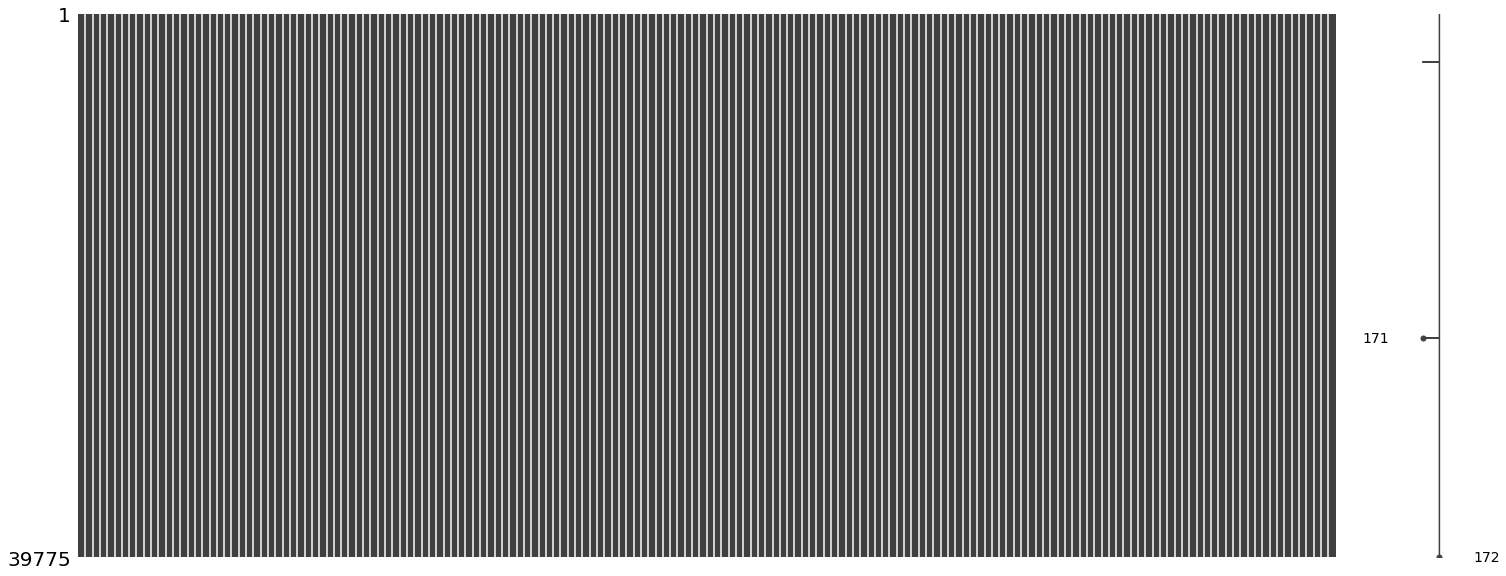

In [26]:
msno.matrix(df)
plt.show()

<a class="anchor" id="data_cleaning_part2"></a>

### Data Cleaning (Replacing Missing Values in Country Column) 

In [27]:
df.columns[df.isnull().any()]

Index(['country'], dtype='object')

In [30]:
null_data = df[df.isnull().any(axis=1)]

In [34]:
null_data

,Q1A,Q1I,Q1E,Q2A,Q2I,Q2E,Q3A,Q3I,Q3E,Q4A,...,screensize,uniquenetworklocation,hand,religion,orientation,race,voted,married,familysize,major
3526,2,41,2104,3,38,1710,2,29,2036,2,...,2,1,1,3,3,60,2,3,2,Industrial and Organisational Psychology
23744,1,11,3330,4,38,3162,4,34,3164,2,...,1,1,1,1,2,60,2,1,3,Unknown


In [42]:
null_data.loc[:, :'country']

,Q1A,Q1I,Q1E,Q2A,Q2I,Q2E,Q3A,Q3I,Q3E,Q4A,...,Q40A,Q40I,Q40E,Q41A,Q41I,Q41E,Q42A,Q42I,Q42E,country
3526,2,41,2104,3,38,1710,2,29,2036,2,...,1,31,3050,1,27,1598,2,1,48933,NaN
23744,1,11,3330,4,38,3162,4,34,3164,2,...,2,30,3833,3,41,2330,4,2,5156,NaN


In [35]:
df['country'] = df['country'].fillna('NONE')

In [37]:
sum(df.isna().sum())

0

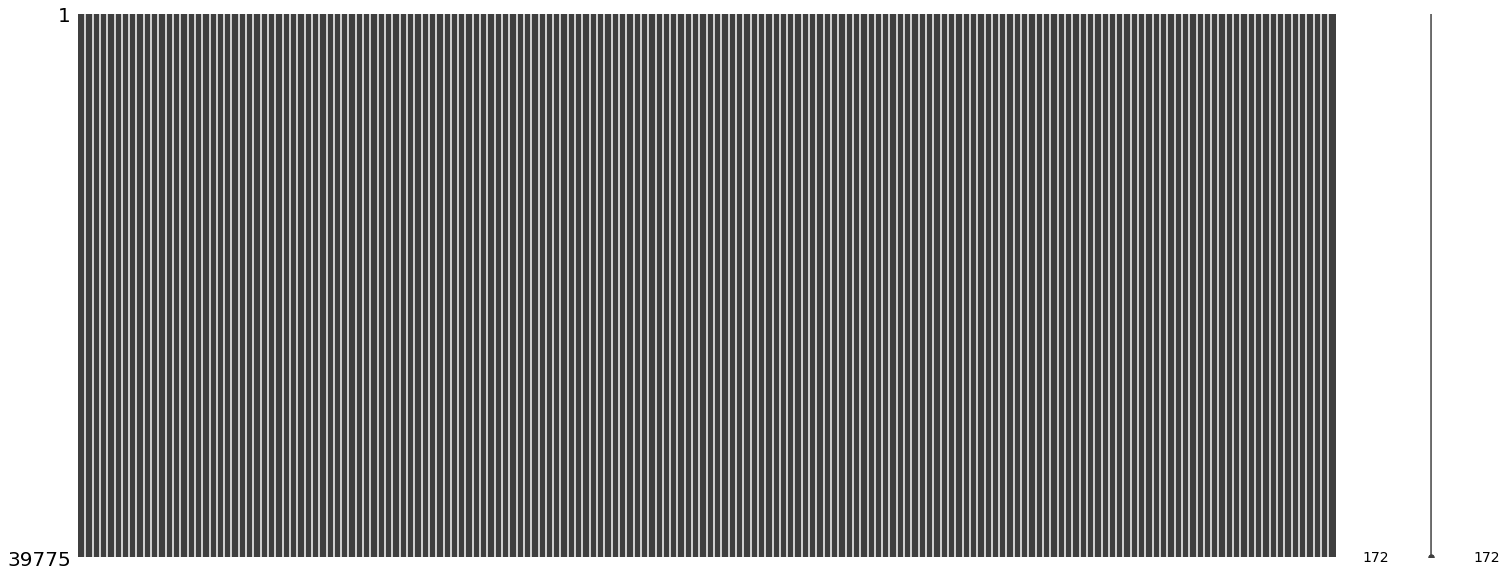

In [43]:
msno.matrix(df)
plt.show()

<a class="anchor" id="noise"></a>

## Data Discretization <a class="anchor" id="median"></a>

### Data Smoothing by Bin Median 

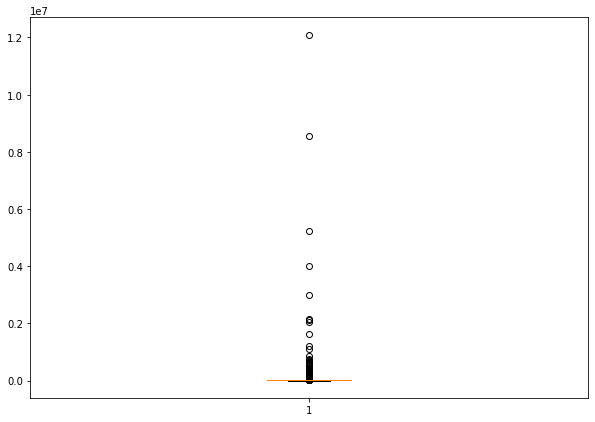

In [9]:
fig = plt.figure(figsize =(10, 7))
plt.boxplot(df['Q1E'])
plt.show()

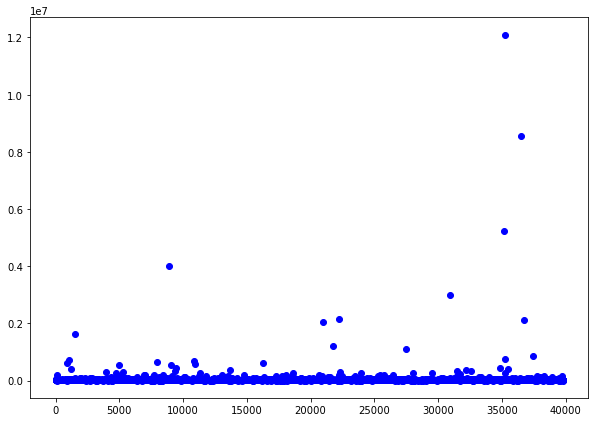

In [11]:
fig = plt.figure(figsize =(10, 7))
x_data = np.arange(0, len(df))
y_data = df['Q1E']
plt.scatter(x_data, y_data, c ="blue")
plt.show()

In [35]:
x_data = np.arange(0, len(df))
y_data = df['Q1E']
x_bins,bin_edges, misc = binned_statistic(y_data,x_data, statistic="median", bins=4)

In [36]:
bin_intervals = pd.IntervalIndex.from_arrays(bin_edges[:-1], bin_edges[1:])

In [37]:
def set_to_median(x, bin_intervals):
    for interval in bin_intervals:
        if x in interval:
            return interval.mid

In [38]:
df['sampled_Q1E'] = df['Q1E'].apply(lambda x: set_to_median(x, bin_intervals))

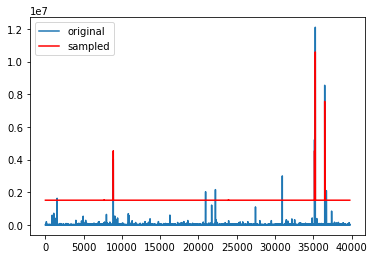

In [39]:
plt.plot(df['Q1E'], label='original')
plt.plot(df['sampled_Q1E'], color='red', label='sampled')
plt.legend()
plt.show()

In [40]:
y_bins = (bin_edges[:-1]+bin_edges[1:])/2
y_bins

array([ 1512942.75,  4538468.25,  7563993.75, 10589519.25])

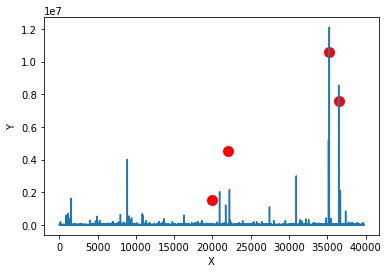

In [41]:
plt.plot(x_data,y_data)
plt.xlabel("X"); 
plt.ylabel("Y")
plt.scatter(x_bins, y_bins,  color= 'red',linewidth=5)
plt.show()

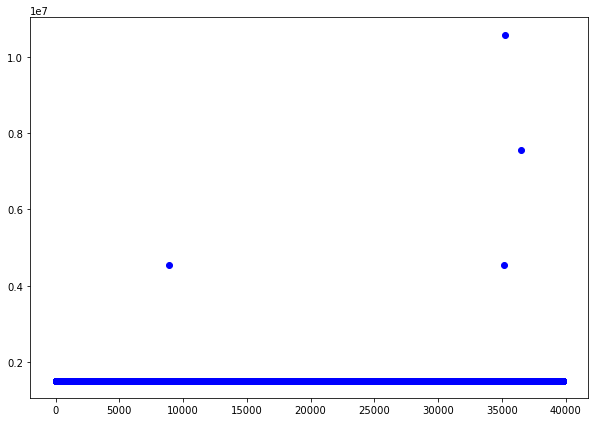

In [43]:
fig = plt.figure(figsize =(10, 7))
x_data = np.arange(0, len(df))
y_data = df['sampled_Q1E']
plt.scatter(x_data, y_data, c ="blue")
plt.show()

<a class="anchor" id="ref"></a>

## References

<html>

<head>
<meta http-equiv=Content-Type content="text/html; charset=windows-1252">
<meta name=Generator content="Microsoft Word 15 (filtered)">
<style>
<!--
 /* Font Definitions */
 @font-face
	{font-family:"Cambria Math";
	panose-1:2 4 5 3 5 4 6 3 2 4;}
 /* Style Definitions */
 p
	{margin-right:0in;
	margin-left:0in;
	font-size:12.0pt;
	font-family:"Times New Roman",serif;}
.MsoChpDefault
	{font-family:"Calibri",sans-serif;}
.MsoPapDefault
	{margin-bottom:8.0pt;
	line-height:107%;}
@page WordSection1
	{size:595.3pt 841.9pt;
	margin:1.0in 1.0in 1.0in 1.0in;}
div.WordSection1
	{page:WordSection1;}
-->
</style>

</head>

<body lang=EN-US style='word-wrap:break-word'>

<div class=WordSection1>

<p style='margin-left:28.35pt;text-indent:-28.35pt'><span lang=EN-MY>Ay-Woan,
P., Sarah, C. P. Y., LyInn, C., Tsyr-Jang, C., &amp; Ping-Chuan, H. (2006).
Quality of life in depression: Predictive Models. <i>Quality of Life Research</i>,
<i>15</i>(1), 39–48. https://doi.org/10.1007/s11136-005-0381-x </span></p>

<p style='margin-left:28.35pt;text-indent:-28.35pt'><span lang=EN-MY>Elbay, R.
Y., Kurtulmu&#351;, A., Arpac&#305;o&#287;lu, S., &amp; Karadere, E. (2020).
Depression, anxiety, stress levels of physicians and associated factors in
covid-19 pandemics. <i>Psychiatry Research</i>, <i>290</i>, 113130. https://doi.org/10.1016/j.psychres.2020.113130
</span></p>

<p style='margin-left:28.35pt;text-indent:-28.35pt'><span lang=EN-MY>Gao, W.,
Ping, S., &amp; Liu, X. (2020). Gender differences in depression, anxiety, and
stress among college students: A longitudinal study from China. <i>Journal of
Affective Disorders</i>, <i>263</i>, 292–300. https://doi.org/10.1016/j.jad.2019.11.121
</span></p>

<p style='margin-left:28.35pt;text-indent:-28.35pt'><span lang=EN-MY>Lew, B.,
Huen, J., Yu, P., Yuan, L., Wang, D.-F., Ping, F., Abu Talib, M., Lester, D.,
&amp; Jia, C.-X. (2019). Associations between depression, anxiety, stress,
hopelessness, subjective well-being, coping styles and suicide in Chinese
University students. <i>PLOS ONE</i>, <i>14</i>(7).
https://doi.org/10.1371/journal.pone.0217372 </span></p>

<p style='margin-left:28.35pt;text-indent:-28.35pt'><span lang=EN-MY>Reece, A.
G., &amp; Danforth, C. M. (2017). Instagram photos reveal predictive markers of
depression. <i>EPJ Data Science</i>, <i>6</i>(1).
https://doi.org/10.1140/epjds/s13688-017-0110-z </span></p>

<p style='margin-left:28.35pt;text-indent:-28.35pt'><span lang=EN-MY>Shah, S.
M., Mohammad, D., Qureshi, M. F., Abbas, M. Z., &amp; Aleem, S. (2020).
Prevalence, psychological responses and associated correlates of depression,
anxiety and stress in a global population, during the coronavirus disease
(covid-19) pandemic. <i>Community Mental Health Journal</i>, <i>57</i>(1),
101–110. https://doi.org/10.1007/s10597-020-00728-y</span></p>

</div>

</body>

</html>